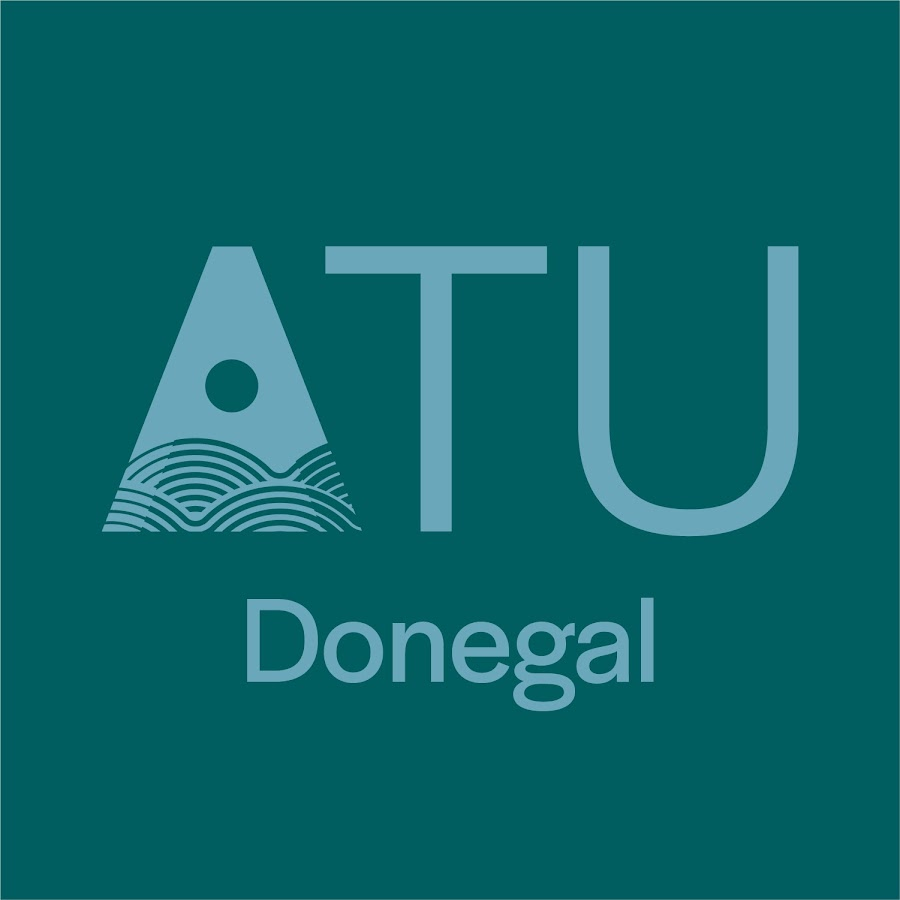

# **MSc in AI Research Dissertation**

## **Topic:** *A Novel Technique to Improve Speech Scores in English Proficiency Based Exams Using Speech Analysis and Natural Language Processing*

### The code used in this dissertation has been used from 2-3 sources and is not my own work. 
###The models are trained and tested and are highly used to detect error in English grammar.
### We have used T5 model from: https://github.com/priya-dwivedi/Deep-Learning/blob/master/GrammarCorrector/T5_Grammar.ipynb
### The voice analyser model has been implemented from: https://github.com/Shahabks/my-voice-analysis
### The POS tagger code blocks have been implemeted from the lectures taught during our NLP module.

## **BEGINNING OF CODE BLOCK**

### **Below we have used T5 model for GEC which is one of the most commonly trained and tested model on C4 corpus dataset.**

In [ ]:
!pip install -q apache_beam
!pip install -q tensorflow-datasets tfds-nightly

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'yashaav'
os.environ['KAGGLE_KEY'] = 'b6cf57c0c68963d850861c52359bcb35'

!pip install kaggle

In [ ]:
!mkdir ~/.kaggle
!pip install -q kaggle

In [ ]:
kaggle_username ='yashaav'
kaggle_key = 'b6cf57c0c68963d850861c52359bcb35'
!echo '{"username":kaggle_username,"key":kaggle_key}' > ~/.kaggle/kaggle.json
!kaggle datasets download -d a0155991rliwei/c4-200m -p /content

100% 19.3G/19.3G [01:51<00:00, 235MB/s]
100% 19.3G/19.3G [01:52<00:00, 185MB/s]


In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 5.0 MB/s 


In [ ]:
!pip install -q transformers

     |████████████████████████████████| 4.0 MB 5.1 MB/s 
     |████████████████████████████████| 895 kB 7.9 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 596 kB 70.5 MB/s 
     |████████████████████████████████| 6.6 MB 49.7 MB/s 


In [ ]:
from transformers import (
   AutoConfig,
   AutoTokenizer,
   AutoModelForSequenceClassification,
)
import pandas as pd

In [ ]:
model_t5 = 't5-base'
# Initialise tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_t5)

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

In [ ]:
!unzip -q /content/c4-200m.zip

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
c4_builder = tfds.builder_from_directory('/content/c4200m/1.0.0')

In [ ]:
num_train_examples = c4_builder.info.splits['train'].num_examples
print(num_train_examples)

183894319


In [ ]:
c4_builder.download_and_prepare()

In [ ]:
train_data = c4_builder.as_dataset(split='train', shuffle_files=True)
train_df = tfds.as_dataframe(train_data.take(550000))

In [ ]:
train_df.shape

(550000, 2)

In [ ]:
train_df.head(10)

,input,output
0,b'And we will resalize that we\xe2\x80\x99ve w...,b'And we will realize that we\xe2\x80\x99ve wo...
1,b'The marvellous Thongs to Notice about Design...,b'The marvellous Things to Notice about Design...
2,b'fix sink drain clogged sink drain wondering ...,b'fix sink drain clogged sink drain wondering ...
3,b'Here we have a wonderufl lecture from a vert...,b'Here we have a wonderful (if long) lecture f...
4,b'Tuesday is in accedaraors day \xe2\x80\x93 n...,b'Tuesday is Accelerator day \xe2\x80\x93 no s...
5,b'Self-care: Getting sleep from at least eight...,b'Self-care: Getting at least eight hours slee...
6,"b'In fact, for maintaining a healthy weight th...","b'In fact, maintaining a healthy weight throug..."
7,b'What are our direction to me | FIRE BABYGIRL!',b'What We\xe2\x80\x99re Up To Right Now | FREE...
8,"b'As years went by, 2014 wasn\xe2\x80\x99t exa...","b'As years go, 2014 wasn\xe2\x80\x99t exactly ..."
9,b'perfect size for my products.',b'The perfect size for my products.'


In [ ]:
train_df['input'] = train_df['input'].str.decode(encoding = 'UTF-8')
train_df['output'] = train_df['output'].str.decode(encoding = 'UTF-8')

In [ ]:
train_df.head(10)

,input,output
0,And we will resalize that we’ve wound down.,And we will realize that we’ve wound down.
1,The marvellous Thongs to Notice about Designin...,The marvellous Things to Notice about Designin...
2,fix sink drain clogged sink drain wondering ho...,fix sink drain clogged sink drain wondering ho...
3,Here we have a wonderufl lecture from a vertan...,Here we have a wonderful (if long) lecture fro...
4,Tuesday is in accedaraors day – no simple carbs!,Tuesday is Accelerator day – no simple carbs!
5,Self-care: Getting sleep from at least eight h...,"Self-care: Getting at least eight hours sleep,..."
6,"In fact, for maintaining a healthy weight thro...","In fact, maintaining a healthy weight througho..."
7,What are our direction to me | FIRE BABYGIRL!,What We’re Up To Right Now | FREE BABYGIRL!
8,"As years went by, 2014 wasn’t exactly a zinger...","As years go, 2014 wasn’t exactly a zinger, but..."
9,perfect size for my products.,The perfect size for my products.


In [ ]:
train_df.to_csv('/content/C4 data/c4_200m_550k.csv', index=False)

In [ ]:
train_data = c4_builder.as_dataset(split='train', shuffle_files=True)
train_df = tfds.as_dataframe(train_data.take(550000))

In [ ]:
train_df.shape

(550000, 2)

In [ ]:
train_df['input'] = train_df['input'].str.decode(encoding = 'UTF-8')
train_df['output'] = train_df['output'].str.decode(encoding = 'UTF-8')

In [ ]:
train_df.head(10)

,input,output
0,1: a sense of shared identify between schools ...,1. A sense of shared identity between schools ...
1,We equally respect the Bible’s Older and Coven...,We equally revere the Bible’s Older and Newer ...
2,I think i've fall in love with guy on the net?!?,I think i've fallen in love with this guy on t...
3,3) The parent together should forward group to...,3) The parent should then forward form to Walk...
4,an important how re-evaluation of a variety of...,an important re-evaluation of a variety of ass...
5,"9 Radis is a vivid light, suitable for illumin...","9 LEDs provides strong light, suitable for lig..."
6,Three years after the first event in Banff (Ca...,"Three years after the first event in Banff, Ca..."
7,Hope you'll grab a fav bev (and come for visit...,Hope you'll grab a fav bev and come for a visi...
8,Maching Leash: The matching leash can be order...,Matching Leash: The matching leash can be orde...
9,Design: Randomized placebo-controlled-trail (P...,Design: Randomized placebo-controlled trial (P...


In [ ]:
train_df.to_csv('/content/C4 data/c4_200m_1M.csv', index=False)


# installing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets tqdm pandas


     |████████████████████████████████| 325 kB 4.9 MB/s 
     |████████████████████████████████| 212 kB 49.0 MB/s 
     |████████████████████████████████| 136 kB 39.0 MB/s 
     |████████████████████████████████| 1.1 MB 38.8 MB/s 
     |████████████████████████████████| 138 kB 60.0 MB/s 
     |████████████████████████████████| 94 kB 2.3 MB/s 
     |████████████████████████████████| 271 kB 40.1 MB/s 
     |████████████████████████████████| 144 kB 51.3 MB/s 
     |████████████████████████████████| 86 kB 4.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.1.1
    Uninstalling dill-0.3.1.1:
      Successfully uninstalled dill-0.3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

In [ ]:
!pip install wandb


     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 181 kB 45.2 MB/s 
     |████████████████████████████████| 144 kB 46.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=22307c1152e59eb6cb88122717ada3493dd1dfb46424e991567ae558560e8a65
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import pandas as pd
from datasets import load_dataset
from tqdm import tqdm

ModuleNotFoundError: ignored

In [ ]:
!nvidia-smi


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import argparse
import datasets
import glob
import os
import json
import time
import logging
import random
import re
from itertools import chain
from string import punctuation

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5Tokenizer,
    get_linear_schedule_with_warmup
)

ModuleNotFoundError: ignored

In [ ]:
def set_seed(seed):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)

set_seed(42)

In [ ]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('/content/C4 data/c4_200m_550k.csv')

In [ ]:
df.shape


(550000, 2)

In [ ]:
df.head(10)


,input,output
0,"1: a sense of shared identify between schools – for example, through proximity geographicus, or a sense of being inclusive communities or representative","1. A sense of shared identity between schools – for example, through geographical proximity, or a sense of being an inclusive community or ethos."
1,We equally respect the Bible’s Older and Covenants and observe the Biblical Feasts and Festivals; we honor Jewish traditions as it points to the Messiah in Israel.,We equally revere the Bible’s Older and Newer Covenants and observe the Biblical Feasts and Festivals. We honor Jewish traditions as they point to the Messiah of Israel.
2,I think i've fall in love with guy on the net?!?,I think i've fallen in love with this guy on the net?!?
3,3) The parent together should forward group to Walkwood Church of England Middle School marked “Admissions”.,"3) The parent should then forward form to Walkwood Church of England Middle School, marked “Admissions”."
4,an important how re-evaluation of a variety of associated paradighms.,an important re-evaluation of a variety of associated paradigms.
5,"9 Radis is a vivid light, suitable for illuminating music score for user playing piano or other musical instruments.","9 LEDs provides strong light, suitable for lighting music score when user playing piano or other musical instrument."
6,"Three years after the first event in Banff (Canada), TEDSummit 2019 will gather that community beyond borders in Edinburgh, Scotland.","Three years after the first event in Banff, Canada, TEDSummit 2019 will gather that community beyond borders in Edinburgh, Scotland."
7,Hope you'll grab a fav bev (and come for visits)over at Bella.,Hope you'll grab a fav bev and come for a visit over at Bella.
8,Maching Leash: The matching leash can be ordered together or separating from the Leashes section.,Matching Leash: The matching leash can be ordered together or separately from the Leashes section.
9,Design: Randomized placebo-controlled-trail (Prevention of Evnents with Angiotensin Converting-Enzyme Inhibition [PEACE] trail).,Design: Randomized placebo-controlled trial (Prevention of Events with Angiotensin Converting Enzyme Inhibition [PEACE] trial).


In [ ]:
from transformers import (
    T5ForConditionalGeneration, T5Tokenizer, 
    Seq2SeqTrainingArguments, Seq2SeqTrainer, DataCollatorForSeq2Seq
  )

from torch.utils.data import Dataset, DataLoader

In [ ]:
model_name = 't5-base'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [ ]:
def calc_token_len(example):
    return len(tokenizer(example).input_ids)

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.10, shuffle=True)
train_df.shape, test_df.shape

((495000, 2), (55000, 2))

In [ ]:
test_df['input_token_len'] = test_df['input'].apply(calc_token_len)


Token indices sequence length is longer than the specified maximum sequence length for this model (660 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
test_df.head(10)


,input,output,input_token_len
486496,Please note: Penguin Young Readers Group (USA) Inc. will be releasing a limited number of NetGalleys and all titles will be discontinued on NetGalley at the sale date of the book.,Please note: Penguin Young Readers Group (USA) Inc. will be releasing a limited number of NetGalleys and all titles will be discontinued on NetGalley at the on sale date of the book.,47
58208,Improve customer service: obtain instant-access to guest Information so your staff can greet your guests by name.,Improve customer service: obtain instant access to guest information so your staff can greet your guests by name.,22
265247,it prevents a correction for going too far.,it prevents a correction from going too far.,12
499297,"What,exactly,d oes 'pkg-config --exists' do?","What, exactly, does 'pkg-config --exists' do?",24
124684,Understand integration requirements use with other can combat skills.,Understand integration requirements with other combat systems.,11
471285,"The one hour whole body deep tissue oil massage and a 30 minute face beauty, a 20 minute deep foot spa and 10 minute re flexology.","One hour whole body deep tissue oil massage, 30 minute facial beauty, 20 minute deep foot spa and 10 minute reflexology.",34
95219,Clarakosi committed rMSKS7b91adaaf6e8: HTTP Prometheus metrics (auther of Clarakosi).,Clarakosi committed rMSKS7b91adaaf6e8: HTTP Prometheus metrics (authored by Clarakosi).,38
495760,"Given that each client is different, as is each counsellor and therapist – a rigid view is often unhelpful when it come to the practice of self-disclosure.","Given that each client is different, as is each counsellor and therapist – a rigid view is often unhelpful when it comes to the practice of self-disclosure.",40
227403,"Alhaji Salisu Haro, the information officer of Daura Local Government Area also told our correspondent ─ that the local council was conscious the rumour ,stressing it is a mere political gimmick Fabricated by enemies of progress.","Alhaji Salisu Haro, the information officer of Daura Local Government Area,also told our correspondent that the local council was conscious of the rumour ,stressing it was a mere political gimmick fabricated by enemies of progress.",58
39076,(Emotion has become a legitimizes subject to serious researches),Emotion has become a legitimate subject for serious research.,19


In [ ]:
test_df['input_token_len'].describe()

count    55000.000000
mean        33.681164
std         27.369336
min          2.000000
25%         17.000000
50%         27.000000
75%         42.000000
max       1398.000000
Name: input_token_len, dtype: float64

In [ ]:
from datasets import Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
test_dataset


Dataset({
    features: ['input', 'output', 'input_token_len', '__index_level_0__'],
    num_rows: 55000
})

In [ ]:
from torch.utils.data import Dataset, DataLoader
class GrammarDataset(Dataset):
    def init(self, dataset, tokenizer,print_text=False):
        self.dataset = dataset
        self.pad_to_max_length = False
        self.tokenizer = tokenizer
        self.print_text = print_text
        self.max_len = 64

    def len(self):
        return len(self.dataset)


    def tokenizedata(self, example):
        input, target_ = example['input'], example['output']

        # tokenize inputs
        tokenizedinputs = tokenizer(input, pad_to_max_length=self.pad_to_max_length, 
                                            max_length=self.max_len,
                                            return_attention_mask=True)

        tokenizedtargets = tokenizer(target, pad_to_max_length=self.pad_to_max_length, 
                                            max_length=self.max_len,
                                            return_attention_mask=True)

        inputs={"input_ids": tokenized_inputs['input_ids'],
            "attention_mask": tokenized_inputs['attention_mask'],
            "labels": tokenized_targets['input_ids']
        }

        return inputs


    def getitem(self, index):
        inputs = self.tokenize_data(self.dataset[index])

        if self.print_text:
            for k in inputs.keys():
                print(k, len(inputs[k]))

        return inputs

In [ ]:
dataset = GrammarDataset(test_dataset, tokenizer, True)
print(dataset[121])

TypeError: ignored

In [ ]:
!pip install rouge_score


In [ ]:
from datasets import load_metric
rouge_metric = load_metric("rouge")

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, padding='longest', return_tensors='pt')


In [ ]:
# Define training related arguments
batch_size = 16
args = Seq2SeqTrainingArguments(output_dir="/content/drive/MyDrive/c4_200m/weights",
                        evaluation_strategy="steps",
                        per_device_train_batch_size=batch_size,
                        per_device_eval_batch_size=batch_size,
                        learning_rate=2e-5,
                        num_train_epochs=1,
                        weight_decay=0.01,
                        save_total_limit=2,
                        predict_with_generate=True,
                        fp16 = True,
                        gradient_accumulation_steps = 6,
                        eval_steps = 500,
                        save_steps = 500,
                        load_best_model_at_end=True,
                        logging_dir="/logs",
                        report_to="wandb")

In [ ]:
import nltk
nltk.download('punkt')
import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Rouge expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

    result = rouge_metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    # Extract a few results
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}

    # Add mean generated length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)
    return {k: round(v, 4) for k, v in result.items()}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import argparse

In [ ]:
args = argparse.ArgumentParser()

In [ ]:
args = ap.parse_args()

usage: ipykernel_launcher.py [-h]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-cf55fee3-d103-4abb-9290-47ef78e68a24.json


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# Define trainer
trainer = Seq2SeqTrainer(model=model, 
                args=args, 
                train_dataset= GrammarDataset(train_dataset, tokenizer),
                eval_dataset=GrammarDataset(test_dataset, tokenizer),
                tokenizer=tokenizer,
                data_collator=data_collator,
                compute_metrics=compute_metrics)

TypeError: ignored

In [ ]:
trainer.train()


NameError: ignored

In [ ]:
trainer.save_model('t5_gec_model')


NameError: ignored

In [ ]:
!zip -r 't5_gec_model.zip' 't5_gec_model'


	zip warning: name not matched: t5_gec_model

zip error: Nothing to do! (try: zip -r t5_gec_model.zip . -i t5_gec_model)


In [ ]:
!mv t5_gec_model.zip /content/c4200m


mv: cannot stat 't5_gec_model.zip': No such file or directory


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
model_name = 'deep-learning-analytics/GrammarCorrector'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name).to(torch_device)

def correct_grammar(input_text,num_return_sequences):
  batch = tokenizer([input_text],truncation=True,padding='max_length',max_length=64, return_tensors="pt").to(torch_device)
  translated = model.generate(**batch,max_length=64,num_beams=4, num_return_sequences=num_return_sequences, temperature=1.5)
  tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
  return tgt_text

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.12k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [ ]:
text = 'the green grasses was eating by 4 cow.'


In [ ]:
print(correct_grammar(text, num_return_sequences=2))


['the green grasses were eating by 4 cows.', 'the green grass was eating by 4 cows.']


In [ ]:
text = 'i finishing my disseration on timely.'


In [ ]:
print(correct_grammar(text, num_return_sequences=1))


['i finished my dissertation timely.']


## Speech Analyser starts from here

In [ ]:
!sudo apt-get install -q -y timidity libsndfile1

In [ ]:
# All the imports to deal with sound data
!pip install pydub numba==0.48 librosa music21

In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa import display as librosadisplay
import math
import statistics
import sys
import pandas as pd  
from scipy.io.wavfile import read,write
from numpy.fft import fft, ifft
# %matplotlib inline!sudo apt-get install -q -y timidity libsndfile1

from IPython.display import Audio, Javascript
from scipy.io import wavfile

from base64 import b64decode

import music21
from pydub import AudioSegment


In [ ]:
#@title [Run this] Definition of the JS code to record audio straight from the browser

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=5):
  try:
    from google.colab import output
  except ImportError:
    print('No possible to import output from google.colab')
    return ''
  else:
    print('Recording')
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    fname = 'recorded_audio.wav'
    print('Saving to', fname)
    b = b64decode(s.split(',')[1])
    with open(fname, 'wb') as f:
      f.write(b)
    return fname

## Below we have to input the audio file

In [ ]:
#@title Select how to input your audio  { run: "auto" }
INPUT_SOURCE = 'UPLOAD' #@param ["https://storage.googleapis.com/download.tensorflow.org/data/c-scale-metronome.wav", "RECORD", "UPLOAD", "./drive/My Drive/YOUR_MUSIC_FILE.wav"] {allow-input: true}

print('You selected', INPUT_SOURCE)

if INPUT_SOURCE == 'RECORD':
  uploaded_file_name = record(300)
elif INPUT_SOURCE == 'UPLOAD':
  try:
    from google.colab import files
  except ImportError:
    print("ImportError: files from google.colab seems to not be available")
  else:
    uploaded = files.upload()
    for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[fn])))
    uploaded_file_name = next(iter(uploaded))
    print('Uploaded file: ' + uploaded_file_name)
elif INPUT_SOURCE.startswith('./drive/'):
  try:
    from google.colab import drive
  except ImportError:
    print("ImportError: files from google.colab seems to not be available")
  else:
    drive.mount('/content/drive')
    # don't forget to change the name of the file you
    # will you here!
    gdrive_audio_file = 'YOUR_MUSIC_FILE.wav'
    uploaded_file_name = INPUT_SOURCE
elif INPUT_SOURCE.startswith('http'):
  !wget --no-check-certificate 'https://storage.googleapis.com/download.tensorflow.org/data/c-scale-metronome.wav' -O c-scale.wav
  uploaded_file_name = 'c-scale.wav'
else:
  print('Unrecognized input format!')
  print('Please select "RECORD", "UPLOAD", or specify a file hosted on Google Drive or a file from the web to download file to download')

## Preparing the audio file for data

In [ ]:
# Function that converts the user-created audio to the format that the model 
# expects: bitrate 16kHz and only one channel (mono).

EXPECTED_SAMPLE_RATE = 8000

def convert_audio_for_model(user_file, output_file='converted_audio_file.wav'):
  audio = AudioSegment.from_file(user_file)
  audio = audio.set_frame_rate(EXPECTED_SAMPLE_RATE).set_channels(1)
  audio.export(output_file, format="wav")
  return output_file

In [ ]:
converted_audio_file = convert_audio_for_model(uploaded_file_name)

In [ ]:
# Loading audio samples from the wav file:
sample_rate, audio_samples = wavfile.read(converted_audio_file, 'rb')

# Show some basic information about the audio.
duration = len(audio_samples)/sample_rate
print(f'Sample rate: {sample_rate} Hz')
print(f'Total duration: {duration:.2f}s')
print(f'Size of the input: {len(audio_samples)}')

# Let's listen to the wav file.
Audio(audio_samples, rate=sample_rate)

In [ ]:
# We can visualize the audio as a waveform.
_ = plt.plot(audio_samples)

## Voice Analysis

In [ ]:
# Installing ipython package
pip install Ipython

In [ ]:
from IPython.display import Audio

In [ ]:
pip install my-voice-analysis

In [ ]:

mysp=__import__("my-voice-analysis")
p="converted_audio_file" # Audio File title
c=r"/content/converted_audio_file.wav" # Path to the Audio_File directory (Python 3.7)

In [ ]:
# to capture the funtion outputs
%%capture captured 
mysp.mysptotal(p,c)
mysp.mysppron(p,c) 
# mysp.myspgend(p,c)

In [ ]:
# to print and save the captured output into a txt file
x=captured.stdout
%store x > file.txt

In [ ]:
# to access the file contents and convert into a string
my_file = open("/content/file.txt", "r")
content = my_file.read()
content_list = content
my_file.close()
# print(content_list)

In [ ]:
# to remove the unwanted character and create a clean string
s = content_list.replace('[]','')
s1 = s.replace('=','')
s2 = s1.replace(':','')
s3 = s2.replace('\n',',')
s4 = " ".join(s3.split())
s5 = s4.replace(',,',',')
s6=s5.replace(' ',':')
s7 = s6.replace('_:','_')
s8 = s7.replace(',',' ')
s9 = s8[4:]
print(s9)

In [ ]:
# to create a dataframe
l =[]
l = s9.split(" ")
df_voice = pd.DataFrame(l)
df_voice.columns =['cat']
df_voice[['Category', 'rating']] = df_voice['cat'].str.split(':', expand=True)
del df_voice['cat']
description =['Detect and count number of syllables','Detect and count number of fillers and pauses','(syllables/sec) original duration','(syllables/sec) speaking duration','(sec) only speaking duration without pauses','total speaking duration with pauses','ratio (speaking duration)/(original duration)','(Hz) global mean of fundamental frequency distribution','(Hz) global standard deviation of fundamental frequency distribution','(Hz) global median of fundamental frequency distribution','(Hz) global minimum of fundamental frequency distribution','(Hz) global maximum of fundamental frequency distribution','(Hz) global 25th quantile of fundamental frequency distribution','(Hz) global 75th quantile of fundamental frequency distribution','(percentage) The probability that that person will later pronounce as they do on the recording','end']
df_voice['Description'] = description
df_voice

## Using Language tool model to predict grammatical errors in sentences

In [ ]:
pip install language-tool-python

In [ ]:
import pandas as pd
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')

In [ ]:
# text = "Your the best but their are allso  good !"
# Here the " text" is the converted text from the audio file
matches = tool.check(text)
print('No. of error matches')
len(matches)

## Correcting the error sentence



In [ ]:
#corrected text
tool.correct(text)

In [ ]:
#converting the list of error matches into a dataframe
df_speech = pd.DataFrame(matches,columns =['ruleId','message','replacements','offsetInContext','context','offset2','errorLength','category','ruleIssueType','sentence'])
df_speech

In [ ]:
sr = df_speech.category.value_counts()
df1_speech = sr.to_frame()

In [ ]:
df1_speech.reset_index(level=0, inplace=True)
df1_speech = df1_speech.rename(columns={'index': 'category', 'category': 'frequency'})
df1_speech.shape

## Below code block gives the feedback to user on where to focus in his English speaking skills

In [ ]:
print ('User has to focus on following Error Categories :')
category_list = df1_speech['category'].tolist() # to print only the list of error categories
category_list = sorted(set(category_list)) # to remove the duplicate values from the colunm
print(category_list)

# POS Is introduced from here.

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc_object = nlp(u"I was delighted to read you are letter last week. Its always a pleasure to recieve the latest news and to here that you and your family had a great summer. We spent last week at the beach and had so much fun on the sand and in the water exploring the coast we were not prepared for the rains that came at the end of the vacation. The best parts of the trip was the opportunities to sightsee and relax. My kids are back in school to. I find their are less things to worry about now that the kids are at school all day. There is plenty of fun things to do in the summer, but by August, I have running out of ideas. I have excepted the fact that we will have to think up brand-new activities next summer; hoping to round up some creative ideas soon.")
for word in doc_object:
    print(f" {word.text:{10}} {word.pos_:{10}} {word.tag_:{10}} {spacy.explain(word.tag_):{20}}")

 I          PRON       PRP        pronoun, personal   
 was        AUX        VBD        verb, past tense    
 delighted  ADJ        JJ         adjective           
 to         PART       TO         infinitival "to"    
 read       VERB       VB         verb, base form     
 you        PRON       PRP        pronoun, personal   
 are        AUX        VBP        verb, non-3rd person singular present
 letter     NOUN       NN         noun, singular or mass
 last       ADJ        JJ         adjective           
 week       NOUN       NN         noun, singular or mass
 .          PUNCT      .          punctuation mark, sentence closer
 Its        DET        PRP$       pronoun, possessive 
 always     ADV        RB         adverb              
 a          DET        DT         determiner          
 pleasure   NOUN       NN         noun, singular or mass
 to         PART       TO         infinitival "to"    
 recieve    VERB       VB         verb, base form     
 the        DET        DT    

In [ ]:
doc_object = nlp(u"I am a good human being. I love animals as well. I want to marry her and take care of her. She is also happy with me.")


In [ ]:
# Count the frequencies of different coarse-grained POS tags in the sentence
POS_frequency = doc_object.count_by(spacy.attrs.POS)
POS_frequency

{84: 3, 85: 2, 86: 3, 87: 2, 89: 1, 90: 1, 92: 3, 94: 1, 95: 7, 97: 4, 100: 4}

In [ ]:
doc_object.vocab[91].text

'INTJ'

In [ ]:
# Using the ".items()" command accesses each item in the dictionary
for tag_id, occurrences in POS_frequency.items():
        print(f" {tag_id:{10}} {doc_object.vocab[tag_id].text:{10}} {occurrences}")

         95 PRON       7
         87 AUX        2
         90 DET        1
         84 ADJ        3
         92 NOUN       3
         97 PUNCT      4
        100 VERB       4
         86 ADV        3
         94 PART       1
         89 CCONJ      1
         85 ADP        2


In [ ]:
type(POS_frequency)

In [ ]:
for tag_id, occurrences in sorted (POS_frequency.items()):
        print(f" {tag_id:{10}} {doc_object.vocab[tag_id].text:{10}} {occurrences}")

In [ ]:
# Get counts on each fine-grained POS tag for the document object
fine_grained_POS = doc_object.count_by(spacy.attrs.TAG)

for tag_id, occurrences in sorted (fine_grained_POS.items()):
    print(f" {tag_id:{20}} {doc_object.vocab[tag_id].text:{10}} {occurrences}")

In [ ]:
# Count the different dependencies:
syn_dep_count = doc_object.count_by(spacy.attrs.DEP)

for tag_id, occurrences in sorted(syn_dep_count.items()):
    print(f'{tag_id:{10}} {doc_object.vocab[tag_id].text:{10}}: {occurrences}')

In [ ]:
from spacy import displacy

doc_object = nlp(u"I am a good human being. I love animals as well. I want to marry her and take care of her. She is also happy with me.")
displacy.render(doc_object, style='dep', jupyter=True, options={'distance': 90})

##Colab technical Specifications

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         226G   40G  187G  18% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  812M  59% /sbin/docker-init
tmpfs           6.4G   32K  6.4G   1% /var/colab
/dev/sda1       233G   41G  192G  18% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!cat /proc/meminfo

MemTotal:       13298572 kB
MemFree:        10317332 kB
MemAvailable:   12040176 kB
Buffers:          130632 kB
Cached:          1707800 kB
SwapCached:            0 kB
Active:          1411520 kB
Inactive:        1365800 kB
Active(anon):     856116 kB
Inactive(anon):      492 kB
Active(file):     555404 kB
Inactive(file):  1365308 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               816 kB
Writeback:             0 kB
AnonPages:        938784 kB
Mapped:           226548 kB
Shmem:              1196 kB
KReclaimable:      87420 kB
Slab:             130164 kB
SReclaimable:      87420 kB
SUnreclaim:        42744 kB
KernelStack:        4912 kB
PageTables:        13248 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6649284 kB
Committed_AS:    3041808 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        7284 kB
VmallocChunk:          0 kB
Percpu:          

## **END OF CODE**